In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rescale
from lantern_fiber_utils import LanternFiber
from constants import VALIDATION_COMPLEX_FIELD_PATH

ImportError: cannot import name 'VALIDATION_COMPLEX_FIELD_PATH' from 'constants' (/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/constants.py)

In [21]:
# For 19 mode:
n_core = 1.44
n_cladding = 1.4345
wavelength = 1.5 # microns
core_radius = 32.8/2 # microns

# Scale parameters
max_r = 2 # Maximum radius to calculate mode field, where r=1 is the core diameter
npix = 200 # Half-width of mode field calculation in pixels
show_plots = False

# Input fields
inp_pix_scale = 4 # input pixels / fiber-field pixels
datapath = './'
input_filename = 'sim_seeing-psf_roughHbandSCExAO.npy'

plot_modefields = True
save_image_sequences = False
imseq_out_dir = datapath+'imseq/'

In [17]:
orig_field.shape

(128, 128)

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))


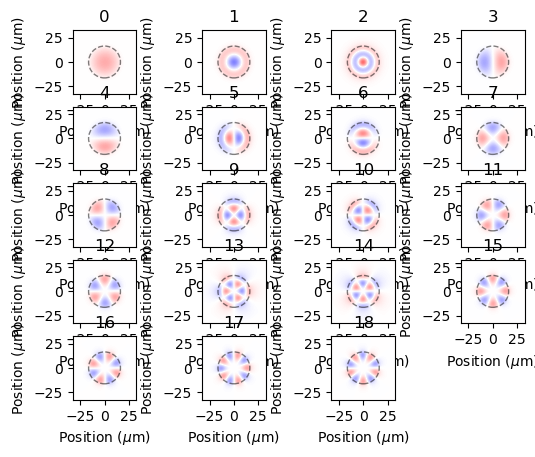

In [18]:
### Make the fiber and modes
f = LanternFiber(n_core, 
                 n_cladding, 
                 core_radius, 
                 wavelength)
f.find_fiber_modes()
f.make_fiber_modes(npix=npix, show_plots=False, max_r=max_r)
modes_to_measure = np.arange(f.nmodes)

# Plot all mode fields
if plot_modefields:
    plt.figure(3)
    plt.clf()
    nplots = len(f.allmodefields_rsoftorder) #7
    zlim = 0.03
    for k in range(nplots):
        plt.subplot(5,4,k+1)
        sz = f.max_r * f.core_radius
        plt.imshow(f.allmodefields_rsoftorder[k], extent=(-sz, sz, -sz, sz), cmap='bwr',
                   vmin=-zlim, vmax=zlim)
        plt.xlabel('Position ($\mu$m)')
        plt.ylabel('Position ($\mu$m)')
        core_circle = plt.Circle((0,0), f.core_radius, color='k', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(core_circle)
        plt.title(k)

In [19]:
orig_field

array([[ 656.03657886+0.86721372j,  962.4836019 +0.86378207j,
        1227.89763954+0.88623873j, ..., 1839.2116683 -2.16092944j,
        1984.7084177 -2.13597356j, 1995.55735345-2.09243227j],
       [ 865.36745024+0.43702121j, 1106.1423063 +0.58057778j,
        1300.86767036+0.69996829j, ..., 1708.59189202-2.18621777j,
        1908.10368754-2.13501375j, 1977.7107984 -2.07378457j],
       [1117.62231567+0.17203514j, 1245.39348039+0.36276824j,
        1332.09651351+0.54301479j, ..., 1434.68038389-2.26367088j,
        1664.63716986-2.17479936j, 1781.11698547-2.09030808j],
       ...,
       [1142.89640965+2.29959401j,  986.59212081+2.32127408j,
         814.93303414+2.46235997j, ...,  758.07629933-0.39911371j,
         824.544017  -1.03319679j, 1047.98430062-1.41996185j],
       [ 959.79083838+2.14951907j,  854.67163125+2.03776208j,
         709.14581248+2.0017336j , ...,  629.26045005-0.94409697j,
         827.25911017-1.46699489j, 1059.56658477-1.7319846j ],
       [ 761.77988822+1.9127

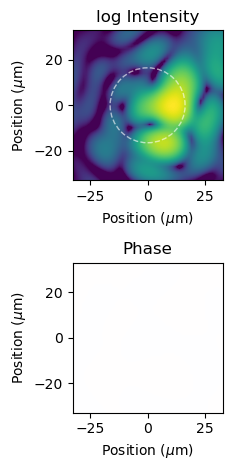

Injection efficiency for mode 0: 0.330641
Injection efficiency for mode 1: 0.042385
Injection efficiency for mode 2: 0.069437
Injection efficiency for mode 3: 0.159959
Injection efficiency for mode 4: 0.004575
Injection efficiency for mode 5: 0.023734
Injection efficiency for mode 6: 0.006635
Injection efficiency for mode 7: 0.037852
Injection efficiency for mode 8: 0.000534
Injection efficiency for mode 9: 0.001501
Injection efficiency for mode 10: 0.000323
Injection efficiency for mode 11: 0.006295
Injection efficiency for mode 12: 0.006827
Injection efficiency for mode 13: 0.003927
Injection efficiency for mode 14: 0.008078
Injection efficiency for mode 15: 0.002136
Injection efficiency for mode 16: 0.003965
Injection efficiency for mode 17: 0.001348
Injection efficiency for mode 18: 0.000301
Total power in input field: 174981952888535.312500
Injection efficiency: 0.710454
Coupled power: 124316648547164.703125


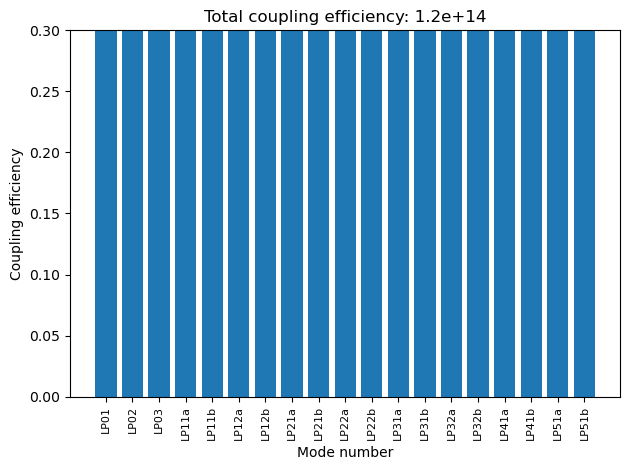

In [20]:
# Get input fields
input_cube = np.load(VALIDATION_COMPLEX_FIELD_PATH)
n_flds = input_cube.shape[0]
n_flds = 1 ## For testing - just show first one


for k in range(n_flds):
    orig_field = input_cube[k,:,:]
    resized_field_real = rescale(orig_field.real, inp_pix_scale)
    resized_field_imag = rescale(orig_field.imag, inp_pix_scale)
    resized_field = resized_field_real + resized_field_imag*1j

    input_field = resized_field
    cnt = input_field.shape[1]//2
    input_field = input_field[cnt-f.npix:cnt+f.npix, cnt-f.npix:cnt+f.npix]

    f.input_field = input_field
    f.plot_injection_field(f.input_field, show_colorbar=False, logI=True, vmin=-3)
    plt.pause(0.001)

    if save_image_sequences:
        fname = imseq_out_dir + 'injplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)

    coupling, mode_coupling, mode_coupling_complex = f.calc_injection_multi(mode_field_numbers=modes_to_measure,
                                                     verbose=True, show_plots=True, fignum=2, complex=True, ylim=0.3,
                                                     return_abspower=True)
    ### The complex LP mode coefficients are in mode_coupling_complex.
    if save_image_sequences:
        fname = imseq_out_dir + 'modeplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)
    plt.pause(0.5)

In [9]:
print(coupling)

67947.51037623703


In [11]:
print(mode_coupling)

[2.68725462e+13 7.80427120e+08 2.76584163e+11 8.24894991e+12
 9.18697902e+11 1.67597870e+12 2.07238469e+10 1.32777216e+11
 8.83844193e+09 3.58847051e+11 2.23073601e+10 1.81874793e+10
 3.65013098e+11 1.56124208e+09 1.84102610e+11 2.29099927e+09
 1.64517206e+11 7.94664620e+07 4.98662934e+09]


In [12]:
print(mode_coupling_complex)

[ 5183873.66781397-14.64139613j    27936.10972504+29.88273611j
   525912.68566984-97.86914448j  2872098.52001885 -2.85305055j
   958487.29850669+20.92217877j -1294595.95860813+35.76659821j
  -143957.79376599-21.79993674j   364386.08147012 +0.52877443j
    94012.95694598-76.51315884j  -599038.43856999 -4.12322336j
  -149356.48666491 +2.17486921j  -134860.96085446-22.40642522j
  -604163.13704185-44.79279215j   -39512.526506  +48.2100214j
   429071.79908349+29.14038534j    47864.32204885-77.0702148j
  -405607.20377967-45.15254296j    -8914.39606639 +2.19518824j
    70616.06983463 +4.93131351j]


In [17]:
np.abs(mode_coupling_complex)**2

array([2.89276712e+04, 8.11209914e+03, 1.00818635e+04, 8.58556840e+02,
       1.47706074e+03, 3.56554811e+03, 1.25285814e+02, 3.49324909e+01,
       3.35413755e+02, 4.11104460e+03, 9.53175393e+02, 1.84894715e+00,
       3.97520857e+03, 2.92724671e+02, 2.44062122e+03, 6.31460579e+02,
       1.63293909e+03, 1.45406108e+02, 2.44649608e+02])

In [13]:
print(mode_coupling/coupling)

[6.84166801e-01 1.98694356e-05 7.04174812e-03 2.10015740e-01
 2.33897674e-02 4.26699046e-02 5.27622798e-04 3.38046729e-03
 2.25024026e-04 9.13613607e-03 5.67938560e-04 4.63047655e-04
 9.29312175e-03 3.97487453e-05 4.68719609e-03 5.83281400e-05
 4.18855770e-03 2.02319180e-06 1.26958057e-04]
